In [ ]:
• There is a non-linear correlation between number of shared rides and average fares.
• Cities in the rural areas had lower utilization of shared rides with fewer drivers and higher fares compared to urban and suburban areas. 
• Higher concentration of drivers in urban cities resulted by a growing demand of shared rides. 
• Shared rides fare is lower in urban areas compared to suburban and rural areas
• About 80.9% shared drivers are concentrated in the urban areas while 16.5% in suburban and 2.6% in rural areas respectively.



In [1]:
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/admin/Documents/Matplotlib/data/city_data.csv"
ride_data_to_load = "C:/Users/admin/Documents/Matplotlib/data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
mergedata_df=city_data.merge(ride_data, on = 'city')
# Display the data table for preview  
mergedata_df.head()  

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Show plot
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

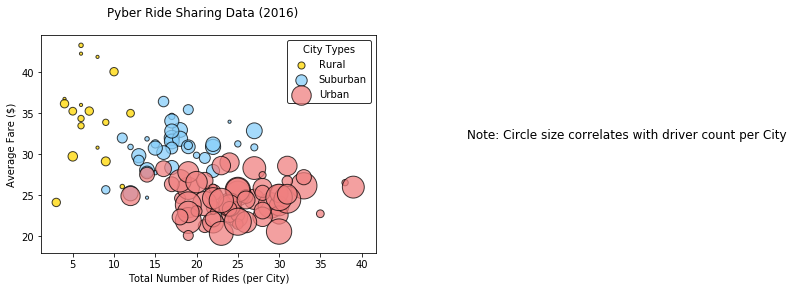

In [3]:
# Obtain the x and y coordinates for each of the three city types
cityride_data=mergedata_df.groupby(["city","type"])


avg_fare=cityride_data["fare"].mean()

total_rides=cityride_data["ride_id"].count()

driver_cnt=cityride_data["driver_count"].mean()



# Create dataframe 

city_df=pd.DataFrame({ "Average Fare": avg_fare,
                      
                       "Number of Rides":total_rides,
                      
                        "Number of Drivers":driver_cnt})
          
city_df.sort_values("Number of Drivers", ascending = False)
city_df=city_df.reset_index()

Urban = city_df.loc[city_df["type"] == "Urban",:]
Rural = city_df.loc[city_df["type"] == "Rural",:]
Suburban=city_df.loc[city_df["type"] == "Suburban",:]


#Defined color scheme
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

#Defined color 
color = {'Urban': color_scheme['Light Coral'], 
'Suburban': color_scheme['Light Sky Blue'], 
'Rural': color_scheme['Gold']} 
plt.suptitle('Pyber Ride Sharing Data (2016)')


# Build the scatter plots for each city types
plt.scatter(Rural['Number of Rides'], Rural['Average Fare'], s = Rural['Number of Drivers']*10,
    color = color['Rural'],edgecolor = 'black', label = 'Rural', alpha = .75)

plt.scatter(Suburban['Number of Rides'], Suburban['Average Fare'], 
s = Suburban['Number of Drivers']*10, 
color = color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)


plt.scatter(Urban['Number of Rides'], Urban['Average Fare'], s =Urban['Number of Drivers']*10, color = color['Urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .75)
#print scatter plot

plt.title('Note: Circle size correlates with driver count per City',y=.5,x=1.75)
# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (per City)')


plt.ylabel('Average Fare ($)')
lgnd = plt.legend(frameon = True, edgecolor = 'black')


# Create a legend
lgnd.set_title('City Types')


# Save Figure
plt.savefig("C:/Users/admin/Documents/Matplotlib/Pyber Ride Sharing Chart")
plt.show

## Total Fares by City Type

In [5]:
# Calculate Type Percents
citytype_data=mergedata_df.groupby(["type"])
total_fare=citytype_data["fare"].sum()



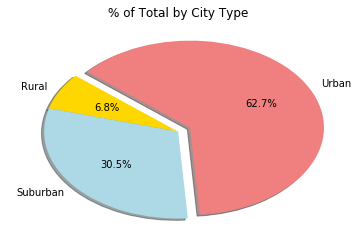

In [6]:
# Build Pie Chart
colors=["gold","lightblue","lightcoral"]
citytype=["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)


plt.pie(total_fare, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total by City Type")
# Save Figure
plt.savefig("C:/Users/admin/Documents/Matplotlib/Total Fares by City Type Piechart")

plt.show()

## Total Rides by City Type

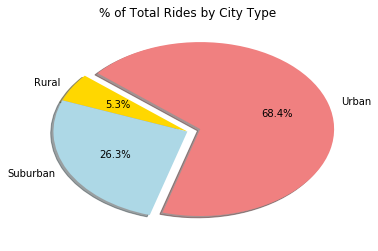

In [7]:
# Calculate Ride Percents
cityride=mergedata_df.groupby(["type"])
total_rides=cityride["ride_id"].count()
city_type=["Rural", "Suburban", "Urban"]
labels=list(city_type)


# Build Pie Chart
colors=["gold","lightblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("C:/Users/admin/Documents/Matplotlib/Total Rides by City Type Piechart")
plt.show()

## Total Drivers by City Type

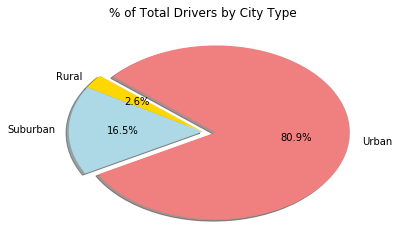

In [9]:
# Calculate Ride Percents
cityride=city_data.groupby(["type"])
total_rides=cityride["driver_count"].sum()
city_type=["Rural", "Suburban", "Urban"]
labels=list(city_type)


# Build Pie Chart
colors=["gold","lightblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("C:/Users/admin/Documents/Matplotlib/Total Drivers by City Type")
plt.show()
